In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("r1z1.csv")

In [3]:
dataset

,X
0,120.5
1,121.0
2,116.5
3,121.5
4,122.0
5,121.0
6,121.0
7,115.0
8,123.9
9,120.8


In [4]:
dataset.describe()

,X
count,98.000000
mean,120.818367
std,2.646193
min,113.200000
25%,119.000000
50%,121.000000
75%,122.500000
max,127.000000


In [23]:
min_val = dataset.min() 
max_val = dataset.max()
dataset_range = max_val - min_val #размах
dataset_range

X           13.800000
X-D         58.039184
X-D3       678.382538
f_vals2      0.989796
dtype: float64

In [6]:
dataset.mean() #мат ожидание

X    120.818367
dtype: float64

In [7]:
#мат ожидание вручную

In [8]:
manual_mean = dataset['X'].to_numpy().sum()/dataset['X'].count()
manual_mean

120.81836734693879

In [9]:
dataset.var() #дисперсия

X    7.00234
dtype: float64

In [10]:
dataset_2 = dataset
dataset_2["X-D"] = (dataset_2["X"] - manual_mean)**2
var_manual = dataset_2["X-D"].to_numpy().sum()/dataset_2["X-D"].count()
var_manual

6.930887130362348

In [11]:
n = dataset["X"].count()
k = (n/(n-1))*var_manual
k

7.002339575005259

In [12]:
dataset.std() #стандартное отклонение

X       2.646193
X-D    10.334739
dtype: float64

In [13]:
std_man = math.sqrt(k)
std_man

2.646193412244324

In [14]:
#dataset["X"].skew() #коэфициент ассиметрии

In [15]:
dataset_3 = dataset
dataset_3["X-D3"] = (dataset_3["X"] - manual_mean)**3
third_moment = dataset_3["X-D3"].to_numpy().sum()/dataset_3["X-D3"].count()
skew = third_moment / std_man**3
skew

-0.2585332827391436

In [16]:
dataset.median() #медиана

X       121.000000
X-D       2.827888
X-D3      0.005992
dtype: float64

In [17]:
X_col = dataset["X"]
X_col = sorted(X_col)
median_man = 0
if len(X_col)%2 == 0:
    median_man = (X_col[len(X_col)//2] + X_col[len(X_col)//2+1])/2
else:
    median_man = X_col[len(X_col)//2+1]
median_man

121.0

In [18]:
q1 = 0
q3 = 0
if len(X_col)%2 == 0:
    q1 = (X_col[len(X_col)//4+1] + X_col[len(X_col)//4])/2
    q3 = (X_col[3*len(X_col)//4+1] + X_col[3*len(X_col)//4])/2
else:
    q1 = X_col[len(X_col)//4+1]
    q3 = X_col[3*len(X_col)//4+1]
iqr_man = q3 - q1
iqr_man

3.5

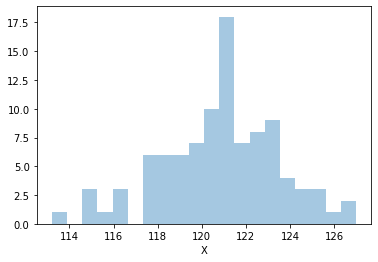

In [19]:
sns.distplot(dataset["X"], bins=20, kde = False, norm_hist = False) #Гистограмма

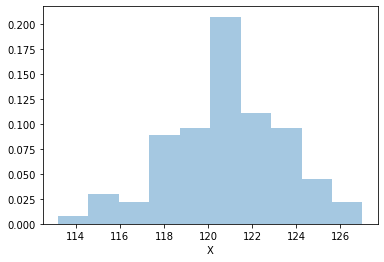

In [20]:
sns.distplot(dataset["X"], bins=10, kde = False, norm_hist = True) #Гистограмма

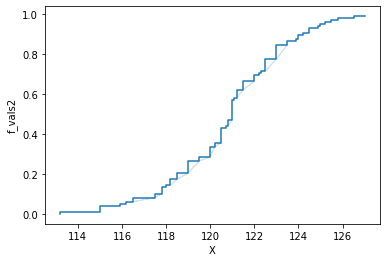

In [21]:
#Эмпирическая функция распределения
def f2(z):
    t = 0
    for i in X_col:
        if i < z:
            t += 1
    return t/len(X_col)
dataset["f_vals2"] = dataset["X"].apply(f2)
sns.lineplot(dataset["X"],dataset["f_vals2"], drawstyle='steps-pre')

In [22]:
from scipy import stats  #мода
stats.mode(dataset['X'])

ModeResult(mode=array([121.]), count=array([10]))